**EGR 598 ML & AI: Final Project** <br>
**Holmes Joseph**<br>
**Rohan Khare**<br>
**Apoorva Uplap**<br>
**Saket Audipudi**<br>

Following is the code and the attached description to constitute the report. <br>


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import re
import string
import numpy as np
import pandas as pd
import random
import missingno
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,confusion_matrix,f1_score,accuracy_score,classification_report, confusion_matrix,balanced_accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from wordcloud import WordCloud,STOPWORDS
import spacy
import nltk
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df = pd.read_csv('gdrive/MyDrive/EGR598/fake_job_postings.csv')
data=df

In [ ]:
# See the fields of the dataset
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [ ]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
print(df.columns)

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')


See the missing fields in the dataframe

<Axes: >

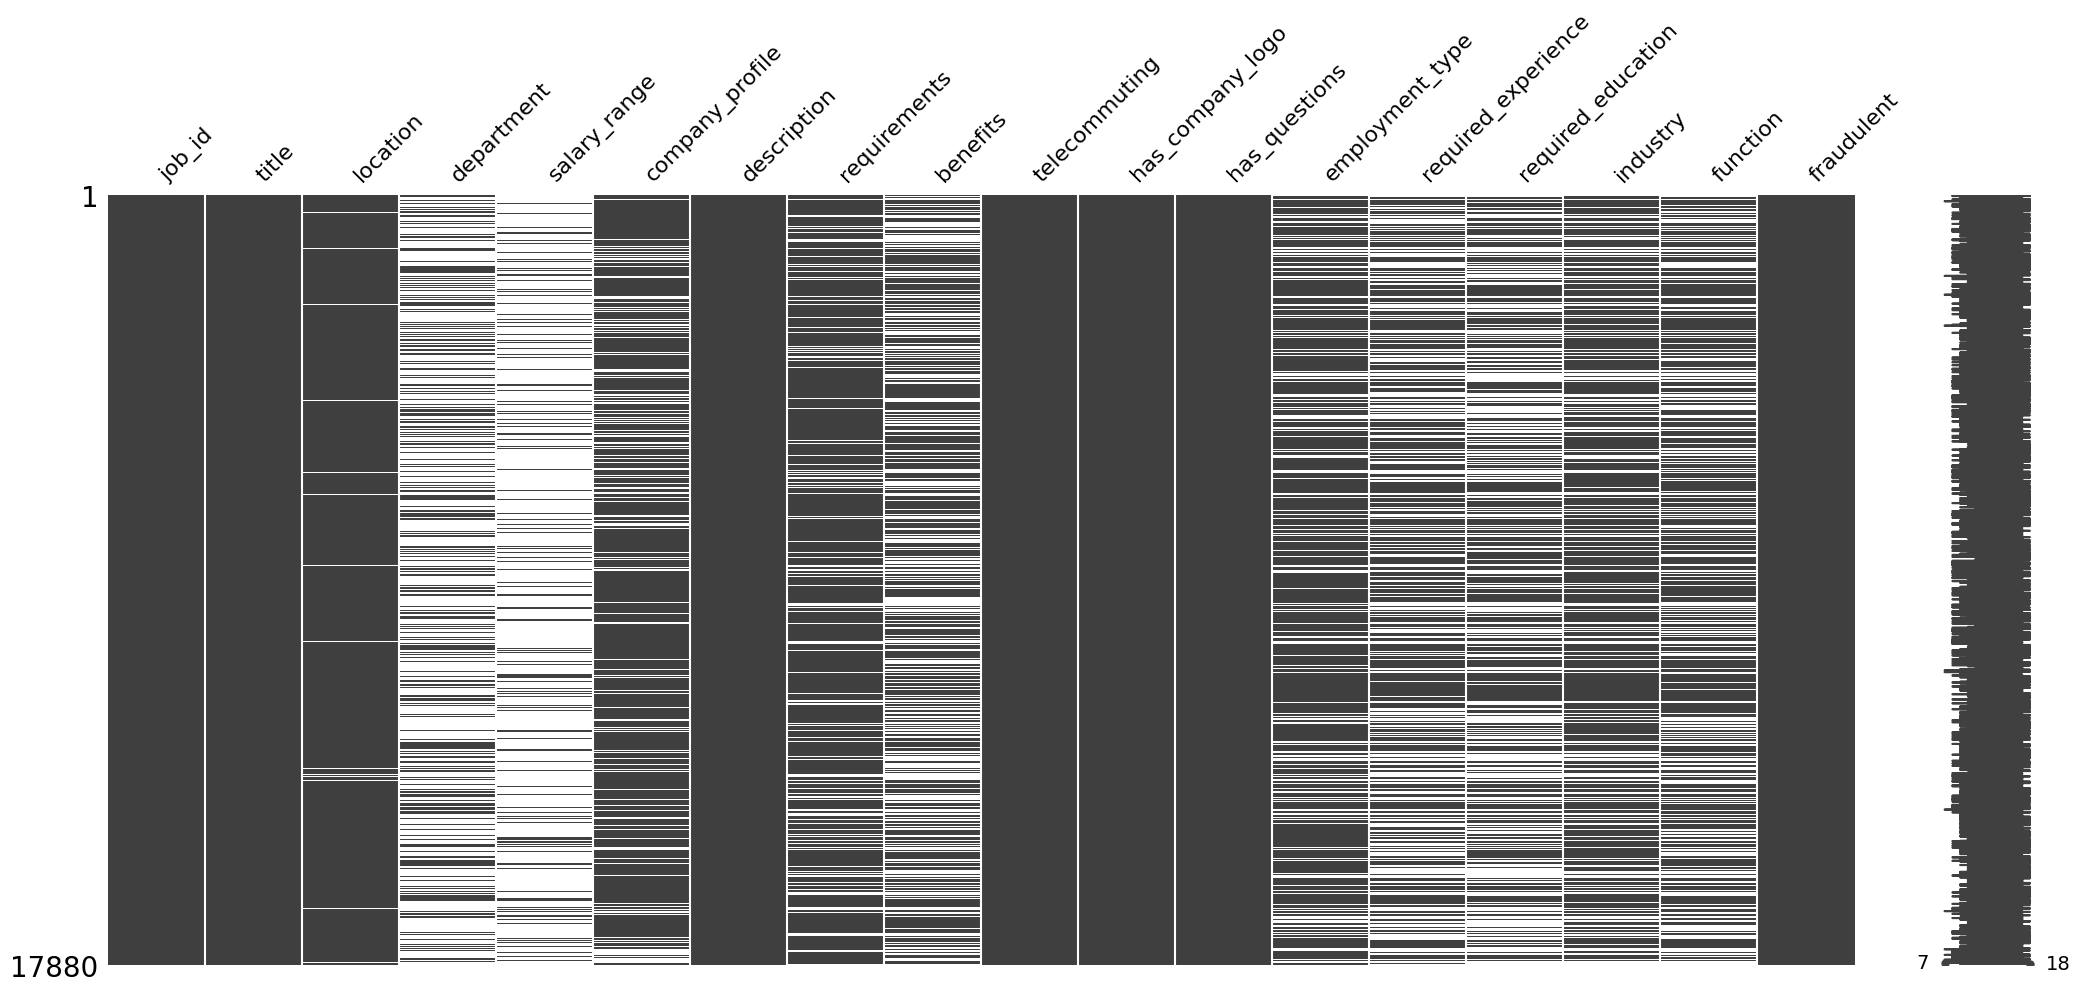

In [ ]:
# See the distribution of missing values per column
missingno.matrix(df)

Remove the numeric columns

In [ ]:
# Remove numerical columns and Fill missing values
columns=['job_id', 'telecommuting', 'has_company_logo', 'has_questions', 'salary_range', 'employment_type']
for col in columns:
    del df[col]

df.fillna(' ', inplace=True)

Write functions to separate the country, state, and city from the location column

In [ ]:
# Get job posted according to country
def split_country(location):
    l = location.split(',')
    return l[0]

# Get job posted according to State
def split_state(location):
    l = location.split(',')
    return l[1]

# Get job posted according to city
def split_city(location):
    l = location.split(',')
    return l[2]

Text(0.5, 0, 'Countries')

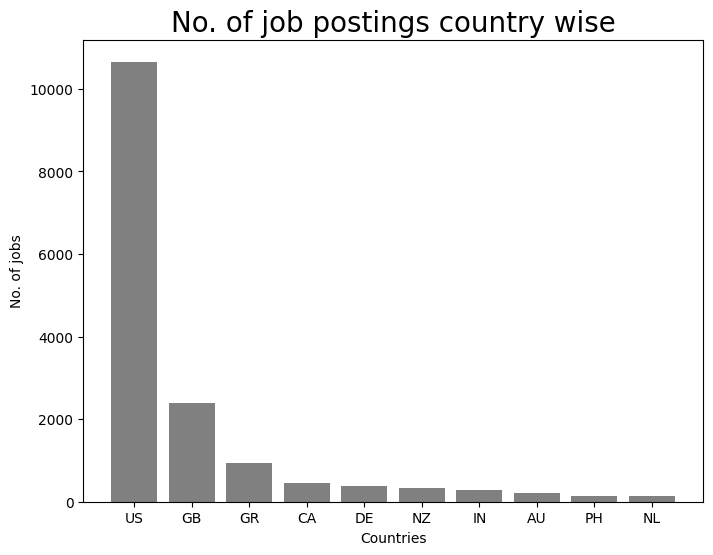

In [ ]:
# Get distribution of job postings country wise
df['country'] = df.location.apply(split_country)
country = dict(df.country.value_counts()[:11])
del country[' ']
plt.figure(figsize=(8,6))
plt.title('No. of job postings country wise', size=20)
plt.bar(country.keys(), country.values(), color = "gray")
plt.ylabel('No. of jobs', size=10)
plt.xlabel('Countries', size=10)

In [ ]:
df.head()

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent,country
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,Internship,,,Marketing,0,US
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,,Marketing and Advertising,Customer Service,0,NZ
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,,,,,0,US
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US
4,Bill Review Manager,"US, FL, Fort Worth",,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US


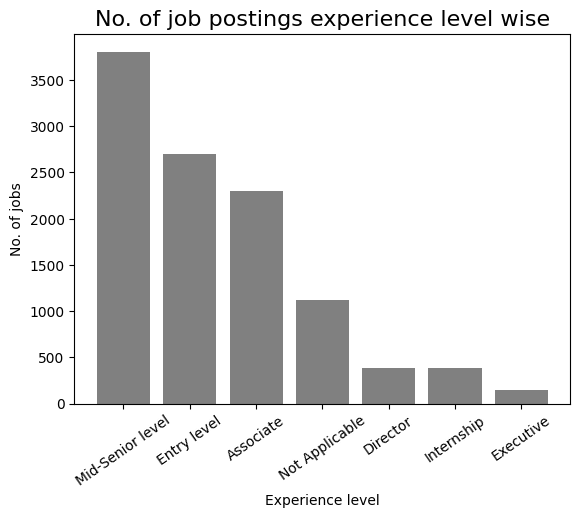

In [ ]:
# Get distribution of job postings experience level wise
experience = dict(df.required_experience.value_counts())
del experience[' ']
plt.title('No. of job postings experience level wise', size=16)
plt.bar(experience.keys(), experience.values(), color = "gray")
plt.xlabel('Experience level', size=10)
plt.ylabel('No. of jobs', size=10)
plt.xticks(rotation=35)
plt.show()

In [ ]:
# title of jobs which are frequent.
print(df.title.value_counts()[:10])

English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
English Teacher Abroad (Conversational)                83
Customer Service Associate - Part Time                 76
Account Manager                                        75
Web Developer                                          66
Project Manager                                        62
Name: title, dtype: int64


Combine all the text columns into a single column

In [ ]:
# Combine columns into a single column for cleaning up the data
df['text']=df['title']+' '+df['location']+' '+df['company_profile']+' '+df['description']+' '+df['requirements']+' '+df['benefits']
del df['title']
del df['location']
del df['department']
del df['company_profile']
del df['description']
del df['requirements']
del df['benefits']
del df['required_experience']
del df['required_education']
del df['industry']
del df['function']
del df['country']

In [ ]:
df.head()

,fraudulent,text
0,0,"Marketing Intern US, NY, New York We're Food52..."
1,0,"Customer Service - Cloud Video Production NZ, ..."
2,0,"Commissioning Machinery Assistant (CMA) US, IA..."
3,0,"Account Executive - Washington DC US, DC, Wash..."
4,0,"Bill Review Manager US, FL, Fort Worth SpotSou..."


Make two dataframes for fraudulent and actual job postings

In [ ]:
fraudjobs_text = df[df.fraudulent==1].text
actualjobs_text = df[df.fraudulent==0].text

Visualize the high frequency words for each class

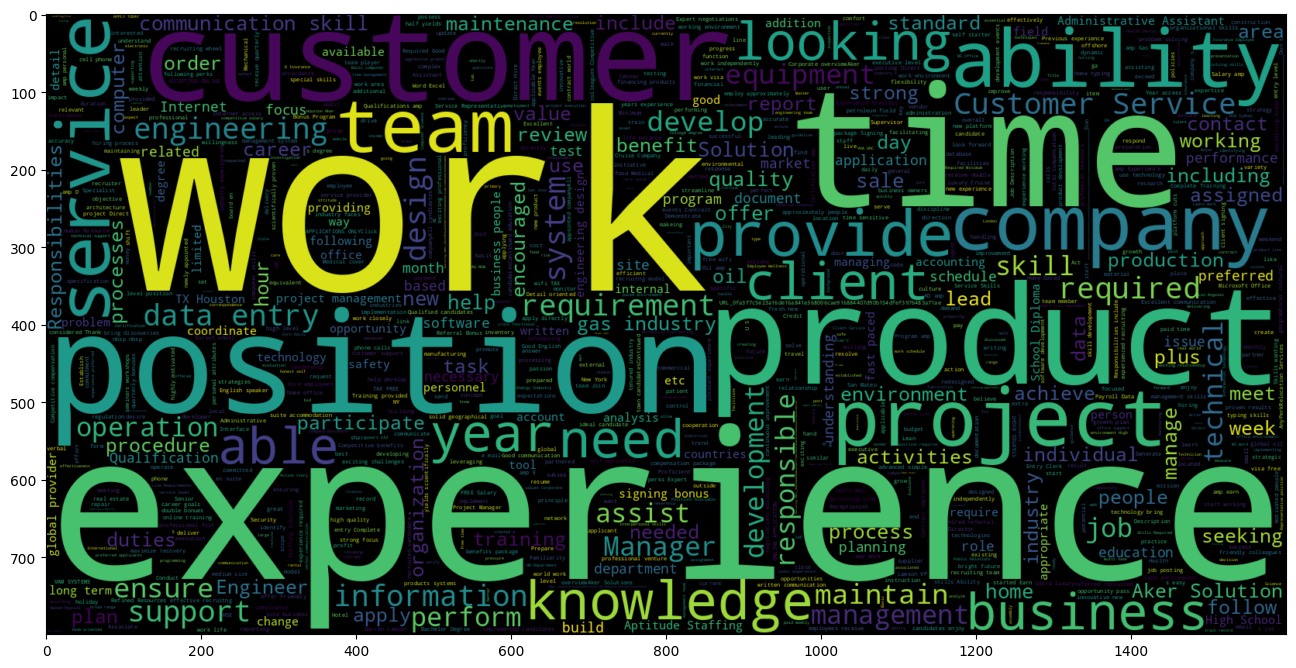

In [ ]:
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS
plt.figure(figsize = (16,14))
wc = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(str(" ".join(fraudjobs_text)))
plt.imshow(wc,interpolation = 'bilinear')

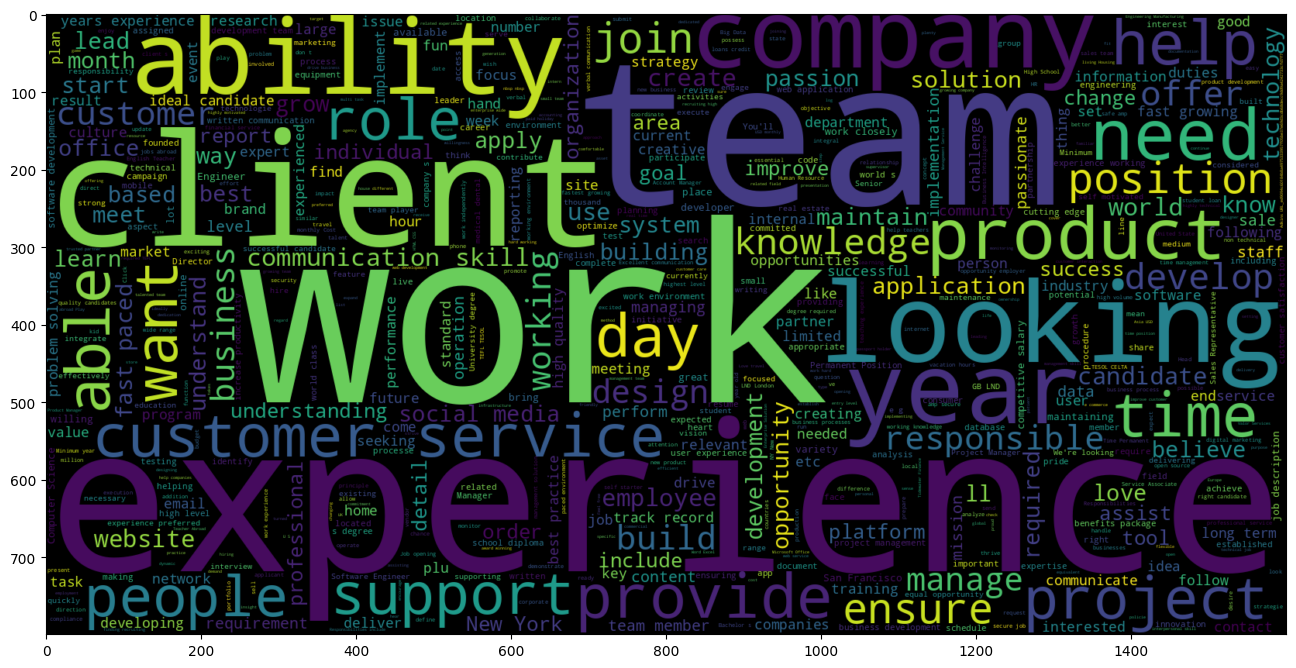

In [ ]:
plt.figure(figsize = (16,14))
wc = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(str(" ".join(actualjobs_text)))
plt.imshow(wc,interpolation = 'bilinear')

In [ ]:
df.head()

,fraudulent,text
0,0,"Marketing Intern US, NY, New York We're Food52..."
1,0,"Customer Service - Cloud Video Production NZ, ..."
2,0,"Commissioning Machinery Assistant (CMA) US, IA..."
3,0,"Account Executive - Washington DC US, DC, Wash..."
4,0,"Bill Review Manager US, FL, Fort Worth SpotSou..."


In [ ]:
df.to_csv('/content/cleaned_data.csv')

In [ ]:
# print a random cleaned text field
df.text[142]

"BI Developer IL, TA, Tel Aviv The only thing we love more than\xa0our data\xa0is our team.We're a group of developers, designers, mathematicians, data scientists, researchers and marketeers that work relentlessly to measure online behavior worldwide and to generate marketing insights.Together, we are shaping the future of web measurement and competitive intelligence. SimilarWeb is a technology-driven Big Data internet company. Our products are based on unique, proprietary technology and data, and use sophisticated algorithms to analyze every website on the internet. We pride ourselves on providing users with comprehensive and beneficial information, giving them valuable insights about their competitor’s traffic.As a BI developer, the ideal candidate will have a very good Java background. We are looking for someone who is highly passionate about data, databases and data analysis. We will prefer someone who is eager to learn and keeps his knowledge up to date with new methodologies, bes

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Read csv file again

data= pd.read_csv('drive/MyDrive/EGR598/fake_job_postings.csv')
k=data

In [ ]:
#Isolate the class column
y=data.iloc[:,17]
x=data.iloc[:,1:17]
target=k['fraudulent']


In [ ]:
x

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales
17876,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing
17877,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN
17878,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design


In [ ]:
x['required_education'].unique()   #identify unique entries

array([nan, "Bachelor's Degree", "Master's Degree",
       'High School or equivalent', 'Unspecified',
       'Some College Coursework Completed', 'Vocational', 'Certification',
       'Associate Degree', 'Professional', 'Doctorate',
       'Some High School Coursework', 'Vocational - Degree',
       'Vocational - HS Diploma'], dtype=object)

In [ ]:
x['required_education'].value_counts()

Bachelor's Degree                    5145
High School or equivalent            2080
Unspecified                          1397
Master's Degree                       416
Associate Degree                      274
Certification                         170
Some College Coursework Completed     102
Professional                           74
Vocational                             49
Some High School Coursework            27
Doctorate                              26
Vocational - HS Diploma                 9
Vocational - Degree                     6
Name: required_education, dtype: int64

In [ ]:
#factorising and mapping entries
k = x.copy()
k['required_education'], education_mapping = pd.factorize(x['required_education'])
education_mapping_dict = dict(enumerate(education_mapping))
mapping_df = pd.DataFrame(list(education_mapping_dict.items()), columns=['Encoded', 'Education'])
print("Education Mapping Table:")
print(mapping_df)


Education Mapping Table:
    Encoded                          Education
0         0                  Bachelor's Degree
1         1                    Master's Degree
2         2          High School or equivalent
3         3                        Unspecified
4         4  Some College Coursework Completed
5         5                         Vocational
6         6                      Certification
7         7                   Associate Degree
8         8                       Professional
9         9                          Doctorate
10       10        Some High School Coursework
11       11                Vocational - Degree
12       12            Vocational - HS Diploma


In [ ]:
import pandas as pd


print("Unique values of 'required_experience' before factorizing:")
print(k['required_experience'].unique())

categorical_columns = ['required_experience', 'employment_type', 'industry', 'function']

for column in categorical_columns:
    k[column], _ = pd.factorize(k[column])

print("\nUnique values of 'required_experience' after factorizing:")
print(k['required_experience'].unique())

columns_to_drop = ['benefits', 'description', 'company_profile', 'requirements']  #removing columns with long texts
k = k.drop(columns_to_drop, axis=1)

print("\nUpdated DataFrame after dropping specified columns:")
print(k)


Unique values of 'required_experience' before factorizing:
['Internship' 'Not Applicable' nan 'Mid-Senior level' 'Associate'
 'Entry level' 'Executive' 'Director']

Unique values of 'required_experience' after factorizing:
[ 0  1 -1  2  3  4  5  6]

Updated DataFrame after dropping specified columns:
                                                   title  \
0                                       Marketing Intern   
1              Customer Service - Cloud Video Production   
2                Commissioning Machinery Assistant (CMA)   
3                      Account Executive - Washington DC   
4                                    Bill Review Manager   
...                                                  ...   
17875                   Account Director - Distribution    
17876                                 Payroll Accountant   
17877  Project Cost Control Staff Engineer - Cost Con...   
17878                                   Graphic Designer   
17879                         Web Appl

In [ ]:
#Factorizing department column
k_copy = k.copy()
k['department'], department_mapping = pd.factorize(k_copy['department'])
department_mapping_df = pd.DataFrame(list(dict(enumerate(department_mapping)).items()), columns=['Encoded', 'Department'])
print("\nMapping DataFrame for department:")
print(department_mapping_df)
print("\nUpdated DataFrame:")
print(k_copy)



Mapping DataFrame for department:
      Encoded           Department
0           0            Marketing
1           1              Success
2           2                Sales
3           3           ANDROIDPIT
4           4                   HR
...       ...                  ...
1332     1332                ADMIN
1333     1333     Customer service
1334     1334     Admin - Clerical
1335     1335  Administrative Dept
1336     1336          Hospitality

[1337 rows x 2 columns]

Updated DataFrame:
                                                   title  \
0                                       Marketing Intern   
1              Customer Service - Cloud Video Production   
2                Commissioning Machinery Assistant (CMA)   
3                      Account Executive - Washington DC   
4                                    Bill Review Manager   
...                                                  ...   
17875                   Account Director - Distribution    
17876               

In [ ]:
k['salary_range'] = k['salary_range'].apply(lambda x: 1 if not pd.isna(x) else 0)  #removing all NaN entries
k

,title,location,department,salary_range,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function
0,Marketing Intern,"US, NY, New York",0,0,0,1,0,0,0,-1,-1,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",1,0,0,1,0,1,1,-1,0,1
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",-1,0,0,1,0,-1,-1,-1,-1,-1
3,Account Executive - Washington DC,"US, DC, Washington",2,0,0,1,0,1,2,0,1,2
4,Bill Review Manager,"US, FL, Fort Worth",-1,0,0,1,1,1,2,0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...
17875,Account Director - Distribution,"CA, ON, Toronto",2,0,0,1,1,1,2,-1,1,2
17876,Payroll Accountant,"US, PA, Philadelphia",77,0,0,1,1,1,2,0,8,26
17877,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",-1,0,0,0,0,1,-1,-1,-1,-1
17878,Graphic Designer,"NG, LA, Lagos",-1,0,0,0,1,3,1,8,82,9


In [ ]:
k=k.drop('title',axis=1)    #drop title column
k=k.drop('location',axis=1)   #drop location column
k

,department,salary_range,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function
0,0,0,0,1,0,0,0,-1,-1,0
1,1,0,0,1,0,1,1,-1,0,1
2,-1,0,0,1,0,-1,-1,-1,-1,-1
3,2,0,0,1,0,1,2,0,1,2
4,-1,0,0,1,1,1,2,0,2,3
...,...,...,...,...,...,...,...,...,...,...
17875,2,0,0,1,1,1,2,-1,1,2
17876,77,0,0,1,1,1,2,0,8,26
17877,-1,0,0,0,0,1,-1,-1,-1,-1
17878,-1,0,0,0,1,3,1,8,82,9


Accuracy: 96.70%
Balanced Accuracy: 82.58%


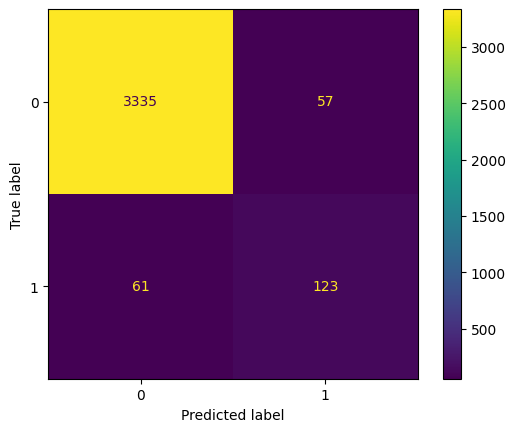

In [ ]:
from sklearn.metrics import accuracy_score, classification_report ,confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(k, target, test_size=.2, random_state =123)


clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

#Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.02%}")
print(f"Balanced Accuracy: {balanced_accuracy:.02%}")

#Calculate confusion matrix
M = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=M)

disp.plot()
plt.show()

Accuracy: 97.76%
Balanced Accuracy: 81.86%


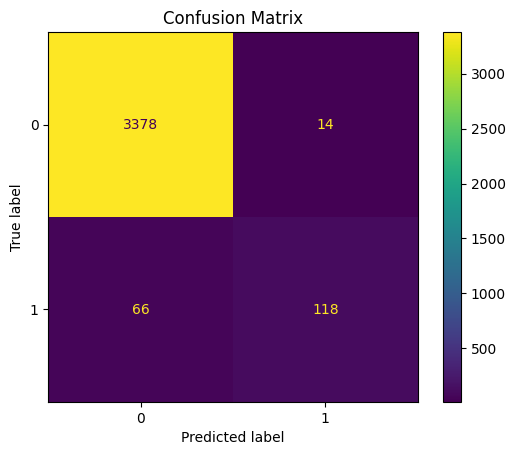

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.02%}")
print(f"Balanced Accuracy: {balanced_accuracy:.02%}")

M = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=M)

disp.plot()
plt.title('Confusion Matrix')
plt.show()


Accuracy: 97.65%
Balanced Accuracy: 82.06%


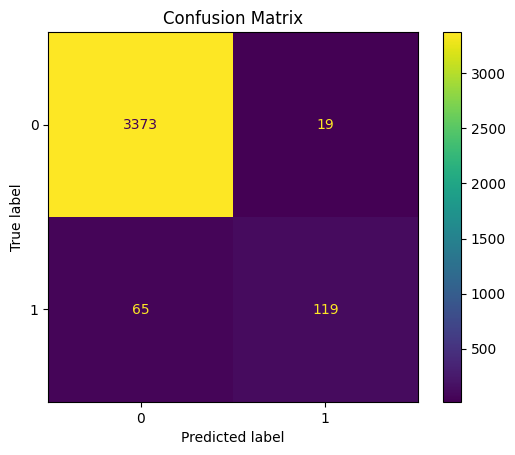

In [ ]:
from xgboost import XGBClassifier


clf = XGBClassifier(random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.02%}")
print(f"Balanced Accuracy: {balanced_accuracy:.02%}")

M = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=M)

disp.plot()
plt.title('Confusion Matrix')
plt.show()


[LightGBM] [Info] Number of positive: 682, number of negative: 13622
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001592 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 450
[LightGBM] [Info] Number of data points in the train set: 14304, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.047679 -> initscore=-2.994412
[LightGBM] [Info] Start training from score -2.994412
Accuracy: 97.99%
Balanced Accuracy: 82.75%


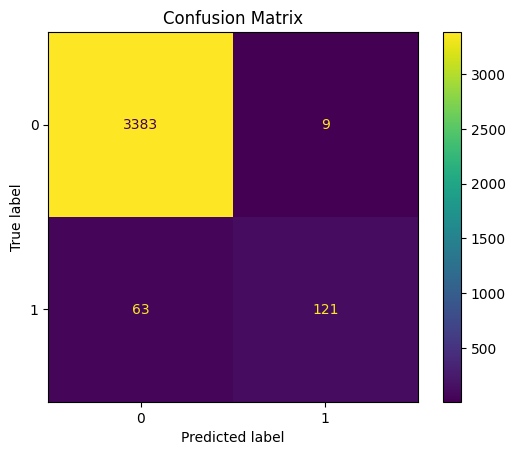

In [ ]:
from lightgbm import LGBMClassifier


clf = LGBMClassifier(random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.02%}")
print(f"Balanced Accuracy: {balanced_accuracy:.02%}")

M = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=M)

disp.plot()
plt.title('Confusion Matrix')
plt.show()


Accuracy: 97.60%
Balanced Accuracy: 81.26%


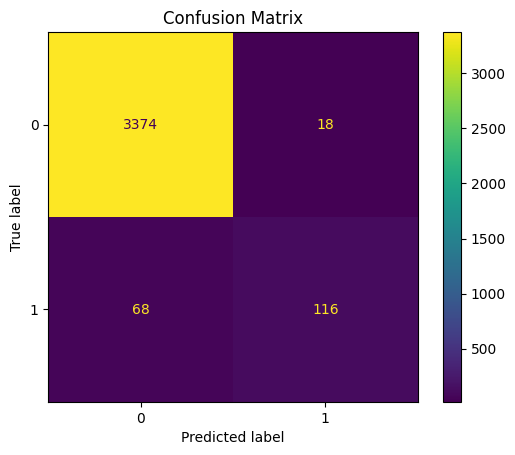

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier(random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.02%}")
print(f"Balanced Accuracy: {balanced_accuracy:.02%}")

M = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=M)
disp.plot()
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.97
Balanced Accuracy: 0.81


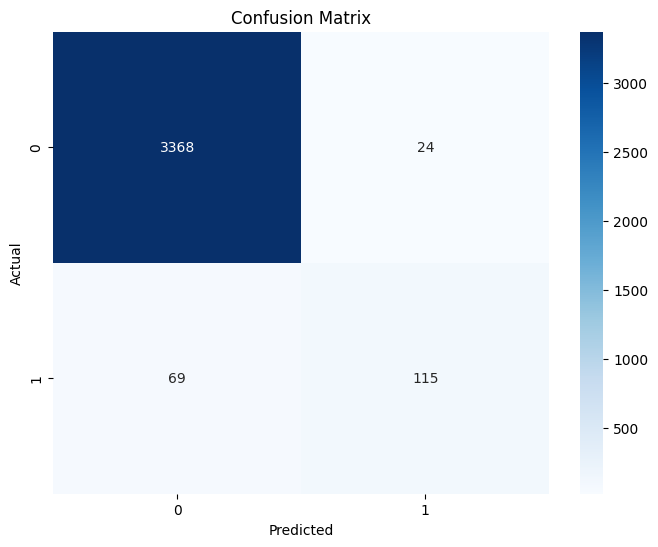

In [ ]:
import seaborn as sns
from sklearn.ensemble import BaggingClassifier


base_classifier = DecisionTreeClassifier()

bagging_classifier = BaggingClassifier(base_classifier, n_estimators=10, random_state=42)

bagging_classifier.fit(X_train, y_train)

y_pred = bagging_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

LP_Accuracy: 0.97
LP_Balanced Accuracy: 0.79


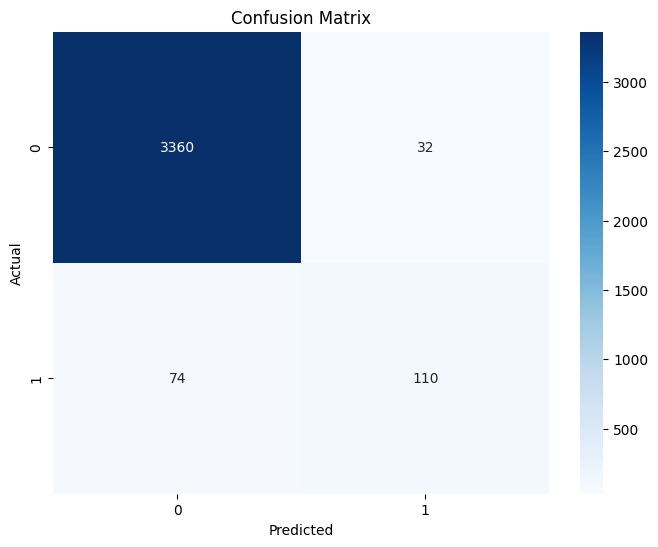

LS_Accuracy: 0.97
LS_Balanced Accuracy: 0.80


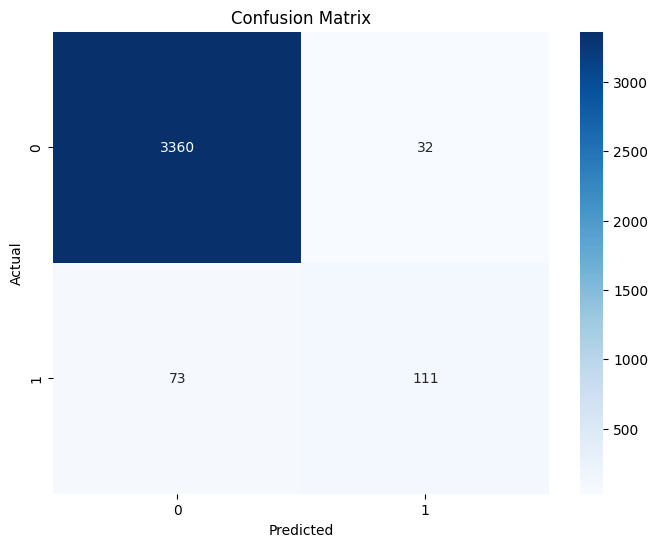

In [ ]:
from sklearn.semi_supervised import LabelPropagation, LabelSpreading

label_propagation_classifier = LabelPropagation()
label_spreading_classifier = LabelSpreading()
label_propagation_classifier.fit(X_train, y_train)
label_spreading_classifier.fit(X_train, y_train)

y_pred_lp = label_propagation_classifier.predict(X_test)
y_pred_ls = label_spreading_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_lp)
print(f"LP_Accuracy: {accuracy:.2f}")
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_lp)
print(f"LP_Balanced Accuracy: {balanced_accuracy:.2f}")
cm_lp = confusion_matrix(y_test, y_pred_lp)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lp, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


accuracy = accuracy_score(y_test, y_pred_ls)
print(f"LS_Accuracy: {accuracy:.2f}")
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_ls)
print(f"LS_Balanced Accuracy: {balanced_accuracy:.2f}")
cm_ls =confusion_matrix(y_test, y_pred_ls)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ls, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Accuracy: 0.81
Balanced Accuracy: 0.56


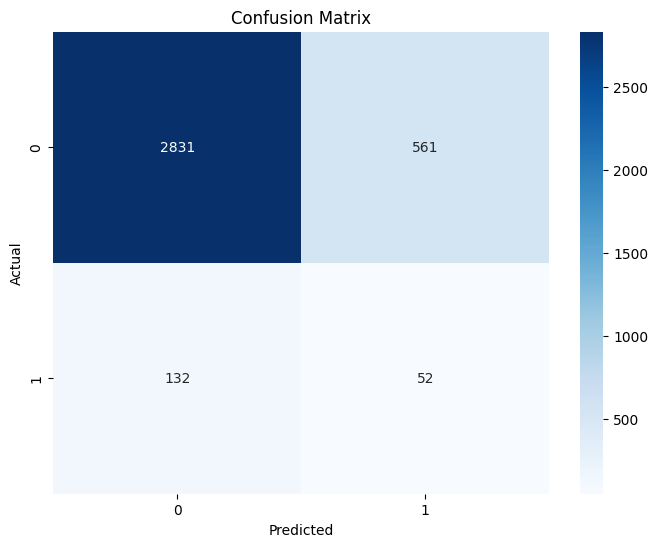

In [ ]:
from sklearn.neighbors import NearestCentroid


nearest_centroid_classifier = NearestCentroid()
nearest_centroid_classifier.fit(X_train, y_train)

y_pred_nc = nearest_centroid_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_nc)
print(f"Accuracy: {accuracy:.2f}")
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_nc)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

cm = confusion_matrix(y_test, y_pred_nc)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Accuracy: 0.97
Balanced Accuracy: 0.78


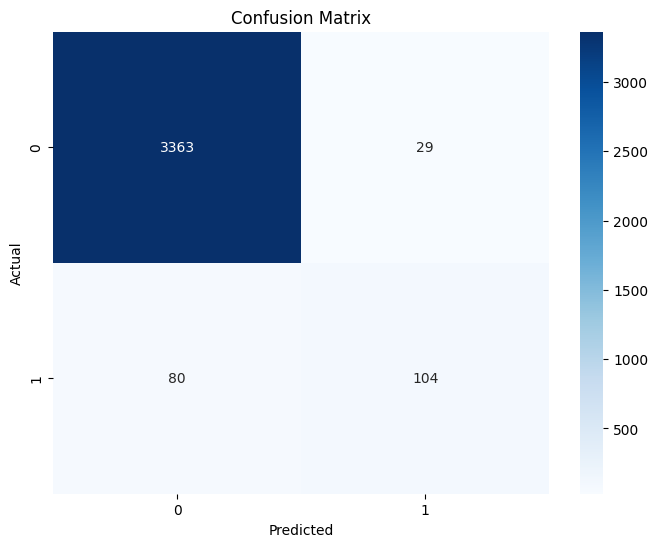

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


kneighbours_classifier = KNeighborsClassifier(n_neighbors=3)
kneighbours_classifier.fit(X_train, y_train)

y_pred_knn = kneighbours_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy: {accuracy:.2f}")
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_knn)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Accuracy: 0.94
Balanced Accuracy: 0.56


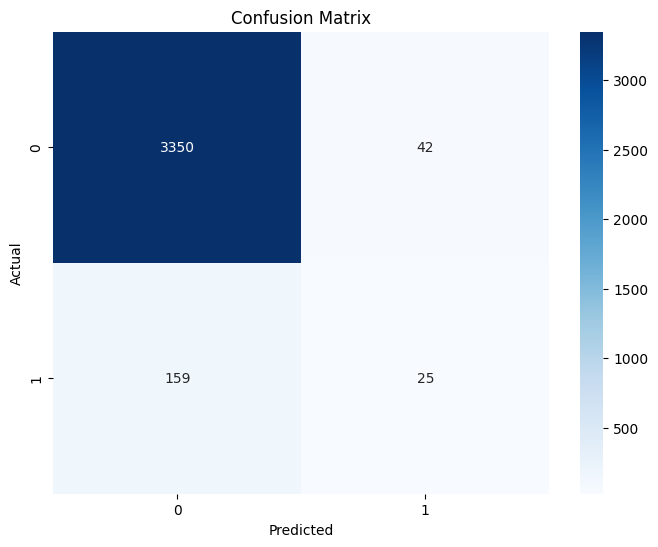

In [ ]:
from sklearn.linear_model import Perceptron

perceptron_classifier = Perceptron()
perceptron_classifier.fit(X_train, y_train)

y_pred_perceptron  = perceptron_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_perceptron )
print(f"Accuracy: {accuracy:.2f}")
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_perceptron )
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

cm = confusion_matrix(y_test, y_pred_perceptron )
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Accuracy: 0.95
Balanced Accuracy: 0.52


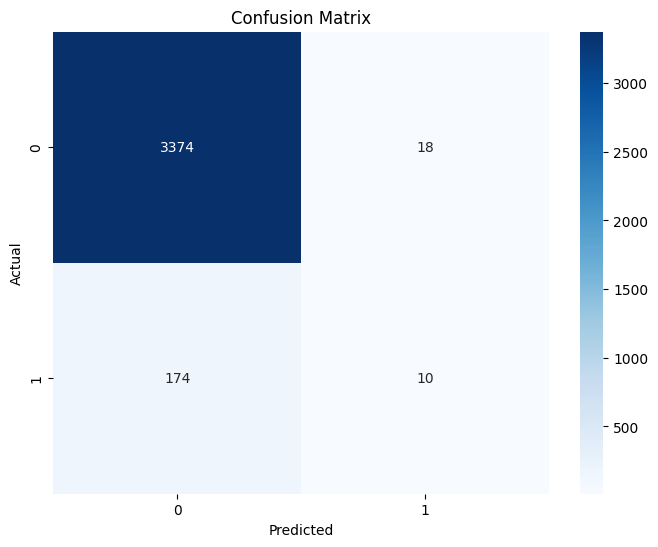

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier

pa_classifier  = PassiveAggressiveClassifier()
pa_classifier .fit(X_train, y_train)

y_pred_pa = pa_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_pa)
print(f"Accuracy: {accuracy:.2f}")
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_pa)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

cm = confusion_matrix(y_test, y_pred_pa)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Accuracy: 0.95
Balanced Accuracy: 0.57


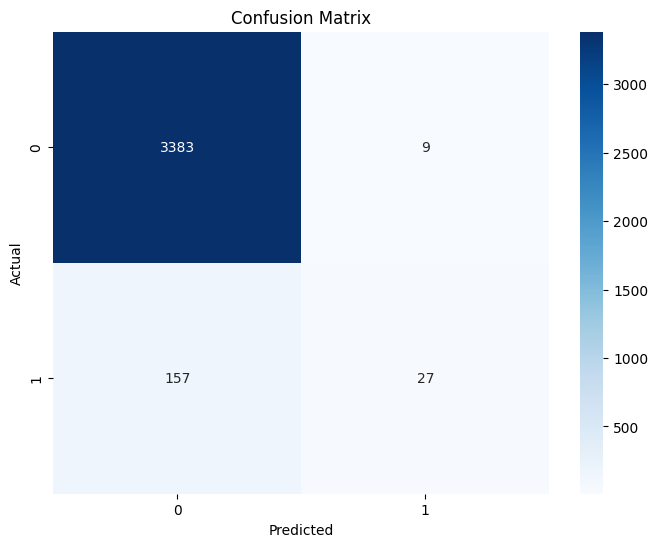

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

base_classifier = DecisionTreeClassifier(max_depth=1)
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)

adaboost_classifier.fit(X_train, y_train)
y_pred_adaboost = adaboost_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_adaboost)
print(f"Accuracy: {accuracy:.2f}")
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_adaboost)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

cm = confusion_matrix(y_test, y_pred_adaboost)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

------------------------------------------------------------------------------
LSTM

In [ ]:
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
import numpy as np

In [ ]:
# Step 1: Load the CSV file
df = pd.read_csv('gdrive/MyDrive/EGR598/fake_job_postings.csv')

# Shuffle the rows with fraudulent=0 and then take the first 500
filtered_df = df[df['fraudulent'] == 0].sample(frac=1).head(500)
# Step 2: Extract and preprocess text data
descriptions = filtered_df['description'].astype(str)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(descriptions)
sequences = tokenizer.texts_to_sequences(descriptions)
max_sequence_len = max([len(x) for x in sequences])
sequences = pad_sequences(sequences, maxlen=max_sequence_len, padding='pre')

# Prepare input and output pairs
input_sequences, labels = sequences[:,:-1], sequences[:,-1]

# Calculate the number of unique words (classes)
num_classes = len(tokenizer.word_index) + 1

# One-hot encode the labels
labels = pd.get_dummies(labels).reindex(columns=range(num_classes), fill_value=0).values


In [ ]:
# Define a LSTM model
model = Sequential()
model.add(Embedding(num_classes, 100, input_length=max_sequence_len - 1))
model.add(LSTM(200, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(150, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(num_classes, activation='softmax'))  # Output layer size = num_classes

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(input_sequences, labels, epochs=30, batch_size=32, callbacks=[EarlyStopping(monitor='loss', patience=5)])


Epoch 1/3
16/16 [==============================] - 242s 14s/step - loss: 9.1051 - accuracy: 0.0860
Epoch 2/3
16/16 [==============================] - 152s 9s/step - loss: 7.5969 - accuracy: 0.1040
Epoch 3/3
16/16 [==============================] - 149s 9s/step - loss: 5.8447 - accuracy: 0.1040


In [ ]:
import random

employment_types = df['employment_type'].dropna().unique().tolist()
required_experiences = df['required_experience'].dropna().unique().tolist()
required_educations = df['required_education'].dropna().unique().tolist()
industries = df['industry'].dropna().unique().tolist()
departments = df['department'].dropna().unique().tolist()
functions = df['function'].dropna().unique().tolist()

def insert_random_category(text, categories):
    if categories:
        # Insert a random category at a random position in the text
        random_category = random.choice(categories)
        words = text.split()
        insert_position = random.randint(0, len(words))
        words.insert(insert_position, random_category)
        return ' '.join(words)
    return text

def generate_text(seed_text, next_words=50):
    model_input_length = model.layers[0].input_shape[1]
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]

        # Ensure the token list is padded to the expected input length of the model
        token_list = pad_sequences([token_list], maxlen=model_input_length, padding='pre')

        predicted = model.predict(token_list, verbose=0)
        predicted_index = np.argmax(predicted, axis=-1)[0]

        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted_index:
                if len(word) <= 15:
                    output_word = word
                    break

        # Add the predicted word to the seed text
        seed_text += " " + output_word if output_word else ""

    return seed_text


In [ ]:
import pandas as pd
import random

def random_bool():
    return random.choice([0, 1])

def create_row(job_id):
    return {
        'job_id': job_id,
        'title': random.choice(df['title'].dropna().unique()),  # Random title from original data
        'location': random.choice(df['location'].dropna().unique()),  # Random location from original data
        'department': random.choice(df['department'].dropna().unique()),
        'salary_range': '',  # Placeholder or user input
        'company_profile': generate_text("Company Profile:", 10),
        'description': generate_text("Job Description:", 100),
        'requirements': generate_text("Requirements:", 20),
        'benefits': generate_text("Benefits:", 10),
        'telecommuting': random_bool(),
        'has_company_logo': random_bool(),
        'has_questions': random_bool(),
        'employment_type': random.choice(df['employment_type'].dropna().unique()),
        'required_experience': random.choice(df['required_experience'].dropna().unique()),
        'required_education': random.choice(df['required_education'].dropna().unique()),
        'industry': random.choice(df['industry'].dropna().unique()),
        'function': random.choice(df['function'].dropna().unique()),
        'fraudulent': 0
    }

# Generate rows
rows = []
job_id = 17880
for _ in range(2):
    rows.append(create_row(job_id))
    job_id += 1

# Create a DataFrame from the generated rows
new_df = pd.DataFrame(rows).set_index('job_id')
new_df.to_csv('/content/generated_jobs.csv')
new_df

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
job_id,,,,,,,,,,,,,,,,,
17880,"Speech Therapist, CCC-SLP (Early Intervention ...","US, IA, Cedar Falls",Lower Level Management,,Company Profile:,Job Description: ...,Requirements: ...,Benefits:,1,1,1,Part-time,Director,Bachelor's Degree,Oil & Energy,Human Resources,0
17881,Fulltime opening for Jr Software Developer Ope...,"US, NY, Oneonta",General,,Company Profile:,Job Description: ...,Requirements: ...,Benefits:,0,0,0,Temporary,Not Applicable,Master's Degree,Music,Education,0


--------------------------------------------------------------------------------
LSTM

In [ ]:
df = pd.read_csv('gdrive/MyDrive/EGR598/fake_job_postings.csv')

data = pd.read_csv('gdrive/MyDrive/EGR598/generated_jobs (3).csv')
num=data.shape[0]
data=data.append(df,ignore_index=True)
data =data.sort_values(by='job_id')
k=data


In [ ]:
num

20

In [ ]:
data.tail()

,job_id,title,location,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,department,function,fraudulent
15,17895,Senior and Junior Flash Games Application Deve...,"US, CA, Westlake Village",NaN,Vocational Company Mercaris Some Director Biot...,Vocational Full-time - HS Diploma Part-time Hi...,Requirements: Full-time Venture Capital & Cont...,Business Part-time Executive Part-time Part-ti...,1,1,1,Full-time,Internship,Some High School Coursework,Plastics,Health,Supply Chain,0
16,17896,UI/UX Lead Designer,"US, MI, Hartford",NaN,Investor Design Part-time Mid-Senior level Dir...,Some Not Applicable College Full-time Internsh...,Temporary Client Success Master's High Executi...,Creative Package/Freight Contract CSR CENTER D...,1,1,1,Other,Not Applicable,Professional,Computer & Network Security,Locaria,Customer Service,0
17,17897,Contracts Administrator,"US, SC, Clemson",NaN,Command Internet and New Media Central Company...,Contract Packaging and Containers Full-time Di...,Other Professional Training & Coaching Associa...,Customer Service Vocational Landlord Executive...,0,1,0,Full-time,Not Applicable,Professional,Hospital & Health Care,Developer,Project Management,0
18,17898,Office Manager / PA,"US, CA, Palo Alto , CA",NaN,Education Industrial Automation Management Ent...,Health Part-time Biotechnology Care Management...,Consulting Marketing and Advertising Certifica...,Mid-Senior Purchasing Higher Education level B...,0,1,0,Contract,Associate,Professional,Computer Games,Pastoral Support,Manufacturing,0
19,17899,Junior DevOps Engineer,"US, CA, Santa Rosa",NaN,Quality Assurance Company Inside Sales Team Pr...,Job Part-time Health Care Provider Not admin I...,Accounting/Auditing Supply Chain Insurance Onl...,Producer Team Advertising Consulting Benefits:...,0,0,1,Other,Associate,Vocational - HS Diploma,Luxury Goods & Jewelry,KHR,Product Management,0


In [ ]:
y=data.iloc[:,17]
x=data.iloc[:,1:17]
target=k['fraudulent']
target=target.to_numpy()
target = target[:17880]

In [ ]:
k['required_education'], education_mapping = pd.factorize(x['required_education'])
education_mapping_dict = dict(enumerate(education_mapping))
mapping_df = pd.DataFrame(list(education_mapping_dict.items()), columns=['Encoded', 'Education'])

In [ ]:


categorical_columns = ['required_experience', 'employment_type', 'industry', 'function']

for column in categorical_columns:
    k[column], _ = pd.factorize(k[column])


columns_to_drop = ['benefits', 'description', 'company_profile', 'requirements']
k = k.drop(columns_to_drop, axis=1)
k_copy = k.copy()
k['department'], department_mapping = pd.factorize(k_copy['department'])
k['salary_range'] = k['salary_range'].apply(lambda x: 1 if not pd.isna(x) else 0)
k=k.drop('title',axis=1)
k=k.drop('location',axis=1)
k=k.drop('job_id',axis=1)
k=k.drop('fraudulent',axis=1)

In [ ]:
dfl = k.tail(20)
k = k.drop(k.tail(20).index)
k=k.to_numpy()
dfl=dfl.to_numpy()

In [ ]:
k

array([[   0,    0,    1, ...,   -1,    0,    0],
       [   0,    0,    1, ...,    0,    1,    1],
       [   0,    0,    1, ...,   -1,   -1,   -1],
       ...,
       [   0,    0,    0, ...,   -1,   -1,   -1],
       [   0,    0,    0, ...,   82,   -1,    9],
       [   0,    0,    1, ...,   25, 1099,   32]])

In [ ]:
from sklearn.metrics import accuracy_score, classification_report ,confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(k,target,  test_size=1, random_state =123)
X_test=dfl
print(y_test)
y_test=np.ones(20)




[0]


* in order to evaluate the performance of our LSTM model we compiled a dataset of 20 generated job postings

* we then used the decision tree classifier to classify theses entries as fraudulent or not

* any entry which is a false negative will mean the LSTM model has succesfully generated a job posting which can pass as authentic

Accuracy: 15.00%
Balanced Accuracy: 15.00%


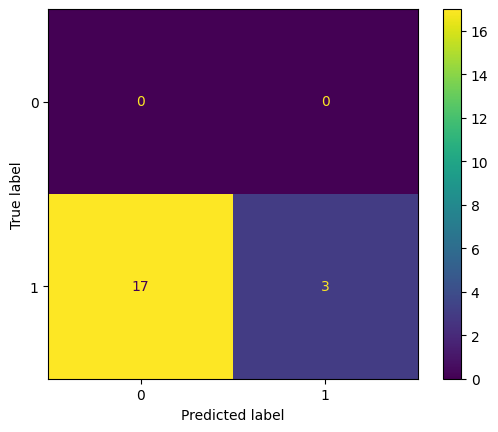

In [ ]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.02%}")
print(f"Balanced Accuracy: {balanced_accuracy:.02%}")
M = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=M)                          # confusion matrix

disp.plot()
plt.show()

of the 20 generated postings 17 of then were falsely classified as authentic(false-positive)